Rutuja Badve
1.Do different age groups prefer anime with varying durations?

In [1]:
import numpy as np
import pandas as pd

In [19]:
users_df = pd.read_csv("../../cleaned_datasets/users_details_dataset_cleaned.csv")
anime_df = pd.read_csv("../../cleaned_datasets/anime_dataset_cleaned.csv")
user_score_df = pd.read_csv("../../cleaned_datasets/user_scores_cleaned.csv")

In [5]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264069 entries, 0 to 264068
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        264069 non-null  int64  
 1   Mal ID            264069 non-null  int64  
 2   Username          264068 non-null  object 
 3   Gender            140554 non-null  object 
 4   Birthday          103198 non-null  object 
 5   Location          53217 non-null   object 
 6   Joined            264069 non-null  object 
 7   Days Watched      264067 non-null  float64
 8   Mean Score        264067 non-null  float64
 9   Watching          264067 non-null  float64
 10  Completed         264067 non-null  float64
 11  On Hold           264067 non-null  float64
 12  Dropped           264067 non-null  float64
 13  Plan to Watch     264067 non-null  float64
 14  Total Entries     264067 non-null  float64
 15  Rewatched         264067 non-null  float64
 16  Episodes Watched  26

In [7]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19976 entries, 0 to 19975
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    19976 non-null  int64  
 1   anime_id      19976 non-null  int64  
 2   Name          19976 non-null  object 
 3   English name  19976 non-null  object 
 4   Other name    19976 non-null  object 
 5   Score         19976 non-null  object 
 6   Genres        19976 non-null  object 
 7   Synopsis      19976 non-null  object 
 8   Type          19976 non-null  object 
 9   Episodes      19682 non-null  float64
 10  Aired         19976 non-null  object 
 11  Start Date    16957 non-null  object 
 12  End Date      8858 non-null   object 
 13  Premiered     19976 non-null  object 
 14  Status        19976 non-null  object 
 15  Producers     19976 non-null  object 
 16  Licensors     19976 non-null  object 
 17  Studios       19976 non-null  object 
 18  Source        19976 non-nu

In [9]:
user_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23803779 entries, 0 to 23803778
Data columns (total 6 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   user_id      int64 
 2   Username     object
 3   anime_id     int64 
 4   Anime Title  object
 5   rating       int64 
dtypes: int64(4), object(2)
memory usage: 1.1+ GB


In [11]:
from datetime import datetime

users_df['Birthday'] = pd.to_datetime(users_df['Birthday'], errors='coerce')
year_today = datetime.now().year
users_df['Age'] = year_today - users_df['Birthday'].dt.year
users_df['Age']

0         39.0
1          NaN
2          NaN
3         36.0
4         36.0
          ... 
264064    27.0
264065     NaN
264066     NaN
264067    31.0
264068     NaN
Name: Age, Length: 264069, dtype: float64

In [13]:
users_df = users_df.dropna(subset=['Age'])

In [15]:
anime_df['Duration']

0        24 min per ep
1          1 hr 55 min
2        24 min per ep
3        25 min per ep
4        23 min per ep
             ...      
19971            4 min
19972            4 min
19973          Unknown
19974          Unknown
19975          Unknown
Name: Duration, Length: 19976, dtype: object

In [25]:
import re

def duration(animeDf):
    match = re.search(r'(\d+)\s*min', animeDf['Duration'])
    if match:
        time = int(match.group(1))  
    else:
        return None 

    if not np.isnan(animeDf['Episodes']) and animeDf['Episodes'] > 0:
        return time * animeDf['Episodes']
    else:
        return None

anime_df['DurationNum'] = anime_df.apply(duration, axis = 1)

print(anime_df[['Duration', 'DurationNum']].head())

        Duration  DurationNum
0  24 min per ep     0.196335
1    1 hr 55 min          NaN
2  24 min per ep     0.196335
3  25 min per ep     0.204516
4  23 min per ep     0.383835


In [27]:
merged_df = pd.merge(user_score_df, users_df, on='Username', how='inner')
merged_df = pd.merge(merged_df, anime_df, on='anime_id', how='inner')

In [31]:
bins = [0, 18, 30, 40, 50, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51+']
merged_df['Age Group'] = pd.cut(merged_df['Age'], bins=bins, labels=labels)

In [33]:
age_group_duration = merged_df.groupby('Age Group')['DurationNum'].mean().reset_index()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15668\2474178671.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_duration = merged_df.groupby('Age Group')['DurationNum'].mean().reset_index()


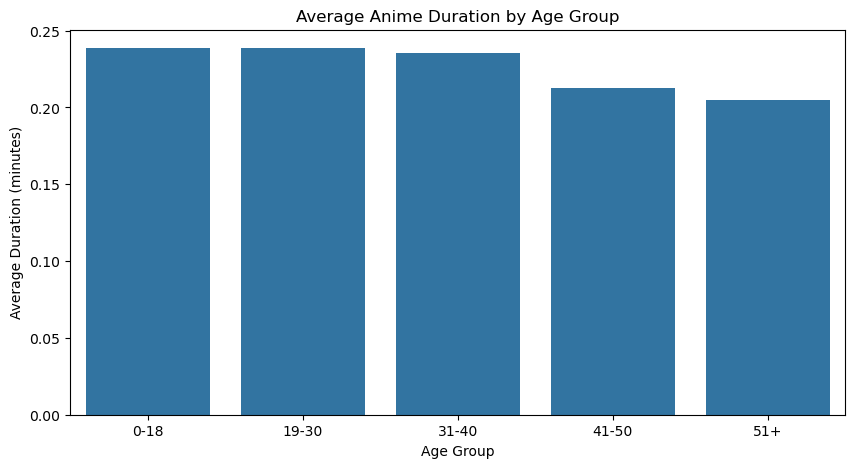

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(x='Age Group', y='DurationNum', data=age_group_duration)
plt.title('Average Anime Duration by Age Group')
plt.ylabel('Average Duration (minutes)')
plt.xlabel('Age Group')
plt.show()

From the above EDA we can see that the age groups 0 to 18 and 19 to 30 watch for the maximum duration after which comes the age group 31 to 40 and the 
41+. To further find out the exact age group which watches for the maximum duration let us focus our EDA on the age group 0 to 30. 

In [45]:
bins = [5, 10, 20, 30, 31]
labels = ['0-5', '6-10', '11-20', '21-30']
merged_df['Age Group below 30'] = pd.cut(merged_df['Age'], bins=bins, labels=labels)

In [47]:
age_group_duration_below30 = merged_df.groupby('Age Group below 30')['DurationNum'].mean().reset_index()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15668\2460504409.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_duration_below30 = merged_df.groupby('Age Group below 30')['DurationNum'].mean().reset_index()


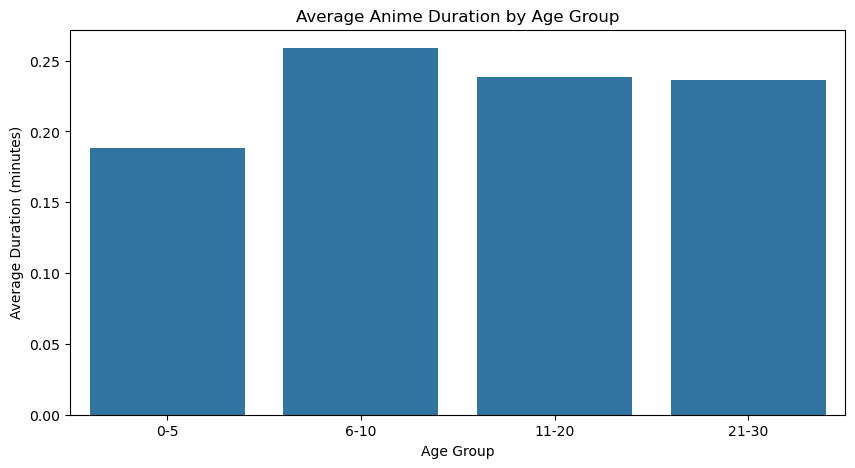

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Age Group below 30', y='DurationNum', data=age_group_duration_below30)
plt.title('Average Anime Duration by Age Group')
plt.ylabel('Average Duration (minutes)')
plt.xlabel('Age Group')
plt.show()

Hence, we can see that the age groups 6 to 10 watches for the maximum duration. The conclusion of our EDA is that we can release more animes which are 
suitable for age group 6 to 10 if we want to grow our anime watching platform.

In [ ]:
2.Does the number of episodes affect the score of anime?

In [112]:
anime_df1 = pd.read_csv(r'C:\Users\DELL\Downloads\data\anime-dataset-2023.csv')

In [114]:
anime_df1['Score'] = pd.to_numeric(anime_df['Score'], errors='coerce')
anime_df1['Score']

0        8.75
1         NaN
2        8.22
3        7.25
4        6.94
         ... 
24900     NaN
24901     NaN
24902     NaN
24903     NaN
24904     NaN
Name: Score, Length: 24905, dtype: float64

In [116]:
anime_df1 = anime_df1.dropna(subset=['Score'])
anime_df1['Score']

0        8.75
2        8.22
3        7.25
4        6.94
5        7.92
         ... 
19583    5.39
19585    6.41
19659    6.07
19740    6.11
19799    7.78
Name: Score, Length: 8126, dtype: float64

In [118]:
anime_df1 = anime_df1.dropna(subset=['Episodes'])  
anime_df1 = anime_df1[anime_df['Episodes'] > 0]  

anime_df1['Episodes'].describe()

count     8126
unique     162
top        1.0
freq      3598
Name: Episodes, dtype: object

In [124]:
print(anime_df1['Episodes'].describe())

count     8126
unique     162
top        1.0
freq      3598
Name: Episodes, dtype: object


In [132]:
anime_df1['Episodes'] = pd.to_numeric(anime_df1['Episodes'], errors='coerce')

bins = [0, 12, 24, 36, 48, 60, 100]  
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61+']

anime_df1['Episode Category'] = pd.cut(anime_df1['Episodes'], bins=bins, labels=labels, right=True)

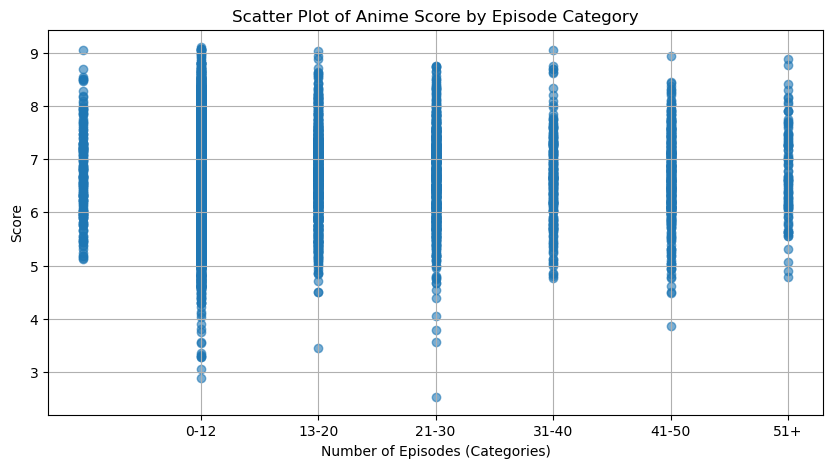

In [154]:
import matplotlib.pyplot as plt

anime_df1['Episode Category Code'] = anime_df1['Episode Category'].cat.codes

plt.figure(figsize=(10, 5))
plt.scatter(anime_df1['Episode Category Code'], anime_df1['Score'], alpha=0.6)
plt.title('Scatter Plot of Anime Score by Episode Category')
plt.xticks(ticks=range(len(labels)), labels=labels)  
plt.xlabel('Number of Episodes (Categories)')
plt.ylabel('Score')
plt.grid(True)
plt.show()

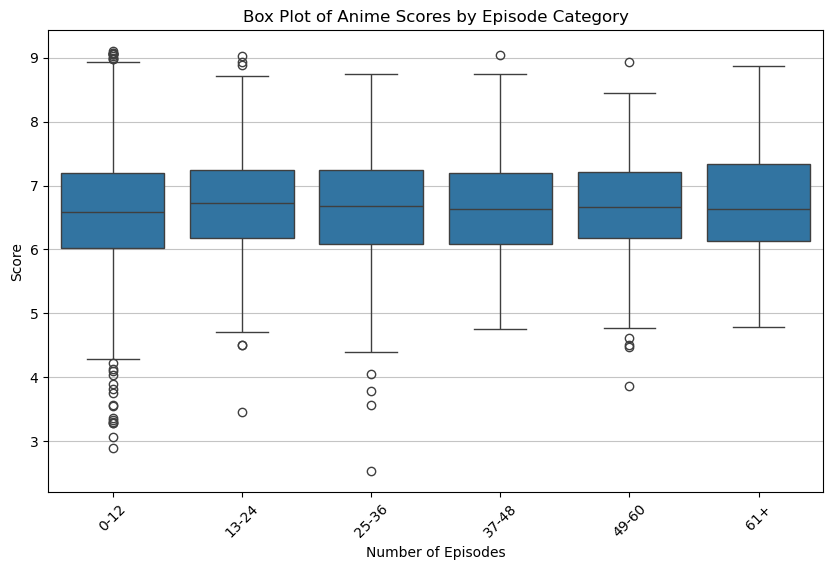

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Episode Category', y='Score', data=anime_df1)
plt.title('Box Plot of Anime Scores by Episode Category')
plt.xlabel('Number of Episodes')
plt.ylabel('Score')
plt.xticks(rotation=45)  
plt.grid(axis='y', alpha=0.75)
plt.show()

From above plots we can see that the maximum score is observed when the episodes are above 51 plus then the score of anime are maximum, hence animes 
having more number of episodes are being liked by users 

So, in future we can consider creating animes which have more number of episodes.